<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-data-analysis-(EDA)" data-toc-modified-id="Exploratory-data-analysis-(EDA)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory data analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Read-and-overview-CSV-data" data-toc-modified-id="Read-and-overview-CSV-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read and overview CSV data</a></span></li><li><span><a href="#Clean-the-data" data-toc-modified-id="Clean-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Clean the data</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-dates" data-toc-modified-id="Dealing-with-dates-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Dealing with dates</a></span></li><li><span><a href="#Dealing-with-prices" data-toc-modified-id="Dealing-with-prices-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Dealing with prices</a></span></li><li><span><a href="#Dealing-with-weights" data-toc-modified-id="Dealing-with-weights-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Dealing with weights</a></span></li></ul></li></ul></li></ul></div>

# Exploratory data analysis (EDA)

In [82]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
import helpers.postprocessor as pr

In [85]:
from datetime import datetime
import re

## Read and overview CSV data

In [86]:
PATH = './data/raw_menu_data.csv'

In [87]:
df = pd.read_csv(PATH)

In [88]:
df.shape

(16427, 8)

In [89]:
df.dtypes

Food      object
Weight    object
Price     object
Type      object
Key       object
Date      object
File      object
SHA1      object
dtype: object

The `SHA1` column is needed only for checking if an Excel file was processed already. We don't need this column here.

In [90]:
df.drop(columns=['SHA1'], inplace=True)

In [91]:
df.head()

,Food,Weight,Price,Type,Key,Date,File
0,Салат из капусты с яблоком,100,86 коп,NaN,14.01.2019,2019-01-14,Меню 14 января.xls
1,"Салат ""Варя гуцульская""",100,1 руб 50 коп,NaN,14.01.2019,2019-01-14,Меню 14 января.xls
2,"Салат""Английский""",100,1 руб 82 коп,NaN,14.01.2019,2019-01-14,Меню 14 января.xls
3,Суп-харчо,250,2 руб 05 коп,Супы,14.01.2019,2019-01-14,Меню 14 января.xls
4,Суп картофельный с фасолью и курицей,250,1 руб 58 коп,Супы,14.01.2019,2019-01-14,Меню 14 января.xls


`Key` are from tabs' names in Excel files, `Date` values are taken from menu titles (first row of a tab). They should represent same dates.

## Clean the data

Process data in the data frame so it is possible to use them for visualizations and summary statistics. Now all fields in the data frame are in text format.

### Dealing with dates

In [92]:
df['Key'][:3]

0    14.01.2019
1    14.01.2019
2    14.01.2019
Name: Key, dtype: object

In [93]:
pd.to_datetime(df['Key'].head(500), format='%d.%m.%Y')

0     2019-01-14
1     2019-01-14
2     2019-01-14
3     2019-01-14
4     2019-01-14
         ...    
495   2018-04-03
496   2018-04-03
497   2018-04-03
498   2018-04-03
499   2018-04-03
Name: Key, Length: 500, dtype: datetime64[ns]

In [94]:
sum(df.Key.isna()), sum(df.Date.isna())

(0, 173)

Some dates are empty. This is becase different menu formatting: a name came in the first row, it did not contain a date

In [95]:
df[df['Date'].isna()]

,Food,Weight,Price,Type,Key,Date,File
2742,"Огурец , помидор свежий",50/50,1 руб 34 коп,Обеденное меню 09.04.2018г. Приятного аппетита!,09.04.2018,NaN,Меню с 09.04 по 14.04.2018г..xls
2743,Винегрет с сельдью,100,1 руб 33 коп,Обеденное меню 09.04.2018г. Приятного аппетита!,09.04.2018,NaN,Меню с 09.04 по 14.04.2018г..xls
2744,Салат из морской и белокочанной капусты,100,71 коп,Обеденное меню 09.04.2018г. Приятного аппетита!,09.04.2018,NaN,Меню с 09.04 по 14.04.2018г..xls
2745,Салат из птицы с яблоками,100,1 руб 79 коп,Обеденное меню 09.04.2018г. Приятного аппетита!,09.04.2018,NaN,Меню с 09.04 по 14.04.2018г..xls
2746,"Салат "" Днепровский""",100,2 руб 90 коп,Обеденное меню 09.04.2018г. Приятного аппетита!,09.04.2018,NaN,Меню с 09.04 по 14.04.2018г..xls
2747,Борщ украинский,250,1 руб 68 коп,Супы,09.04.2018,NaN,Меню с 09.04 по 14.04.2018г..xls
2748,"Суп ""Полевой""",250,1 руб 12 коп,Супы,09.04.2018,NaN,Меню с 09.04 по 14.04.2018г..xls
2749,Котлета из птицы с тмином,125,2 руб 20 коп,Вторые блюда,09.04.2018,NaN,Меню с 09.04 по 14.04.2018г..xls
2750,Говядина в кисло-сладком соусе,75/100,4 руб 55 коп,Вторые блюда,09.04.2018,NaN,Меню с 09.04 по 14.04.2018г..xls
2751,Котлета по-киевски,125,2 руб 79 коп,Вторые блюда,09.04.2018,NaN,Меню с 09.04 по 14.04.2018г..xls


For the missed values we can take corresponing values of the `Key` column.

Are all dates in the same format?

In [96]:
df['Key'].str.len().value_counts()

10    14409
11     1993
9        25
Name: Key, dtype: int64

In [97]:
df[df['Key'].str.len() == 11].head()

,Food,Weight,Price,Type,Key,Date,File
879,Салат с крабовыми палочками и кукурузой,100,1 руб 14 коп,NaN,06.08.2018,2018-09-06,Меню с 03-07 сентября.xls
880,"Салат из помидоров,капусты и сладкого перца",100,1 руб 26 коп,NaN,06.08.2018,2018-09-06,Меню с 03-07 сентября.xls
881,Яйца фаршированные грибами,1шт/70,1 руб 27 коп,NaN,06.08.2018,2018-09-06,Меню с 03-07 сентября.xls
882,"Салат""Полесский""",100,1 руб 98 коп,NaN,06.08.2018,2018-09-06,Меню с 03-07 сентября.xls
883,Салат из свежих огурцов,100,80 коп,NaN,06.08.2018,2018-09-06,Меню с 03-07 сентября.xls


In [98]:
df.loc[879]['Key'], df.loc[879]['Date']

('06.08.2018 ', '2018-09-06')

"Hello, We're whitespaces. Missed us?"

In [99]:
df[df['Key'].str.len() == 9].head()

,Food,Weight,Price,Type,Key,Date,File
14571,Морковь пряная,100,79 коп,NaN,16.082019,2019-08-16,Меню с 12-16 августа.xls
14572,Яйцо фыршированое грибами,1шт/70/2,1 руб 27 коп,NaN,16.082019,2019-08-16,Меню с 12-16 августа.xls
14573,"Салат из помидоров,огурцов и сл.перца",100,1 руб 49 коп,NaN,16.082019,2019-08-16,Меню с 12-16 августа.xls
14574,Салат из птицы с пекинской кап,100,1 руб 76 коп,NaN,16.082019,2019-08-16,Меню с 12-16 августа.xls
14575,"Суп""Польский""",250,1 руб 26 коп,Супы,16.082019,2019-08-16,Меню с 12-16 августа.xls


Dates in the `Key` column are often inconsistent. We will use dates from the `Date` column instead. If the `Date` is empty, we will try to take respective date from the `Key` column.

In [100]:
df['MenuDate'] = pd.to_datetime(df['Date'])

In [101]:
df['MenuDate'].describe()

count                   16254
unique                    415
top       2018-01-26 00:00:00
freq                     1065
first     2017-11-20 00:00:00
last      2019-08-23 00:00:00
Name: MenuDate, dtype: object

Missing values try to take from the `Key` column.

In [102]:
df[df['MenuDate'].isna()]['Key'].str.strip().str.len().value_counts()

10    173
Name: Key, dtype: int64

In [103]:
sum(df['MenuDate'].isna())

173

In [104]:
df.loc[df['MenuDate'].isna(), 'MenuDate'] = \
    pd.to_datetime(df[df['MenuDate'].isna()]['Key'].str.strip(), format='%d.%m.%Y')

In [105]:
df['MenuDate'].describe()

count                   16427
unique                    423
top       2018-01-24 00:00:00
freq                     1065
first     2017-11-20 00:00:00
last      2019-08-23 00:00:00
Name: MenuDate, dtype: object

In [106]:
df_date_proc = df.drop(columns=['Key', 'Date'])

In [107]:
df_date_proc.head()

,Food,Weight,Price,Type,File,MenuDate
0,Салат из капусты с яблоком,100,86 коп,NaN,Меню 14 января.xls,2019-01-14
1,"Салат ""Варя гуцульская""",100,1 руб 50 коп,NaN,Меню 14 января.xls,2019-01-14
2,"Салат""Английский""",100,1 руб 82 коп,NaN,Меню 14 января.xls,2019-01-14
3,Суп-харчо,250,2 руб 05 коп,Супы,Меню 14 января.xls,2019-01-14
4,Суп картофельный с фасолью и курицей,250,1 руб 58 коп,Супы,Меню 14 января.xls,2019-01-14


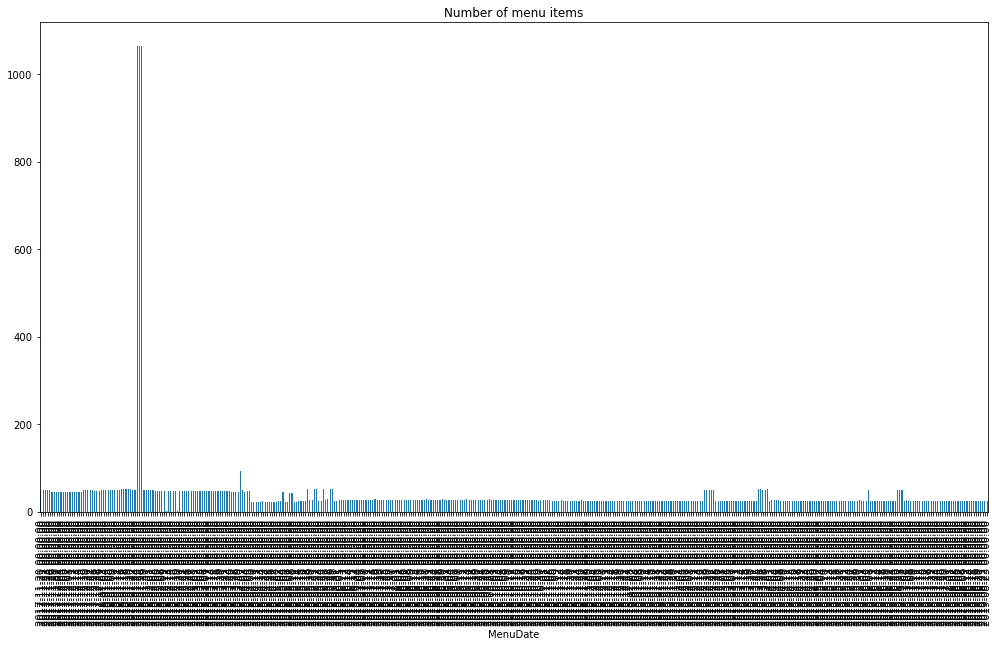

In [108]:
df_date_proc.groupby('MenuDate').size().plot.bar(rot=90, figsize=(17, 9), title='Number of menu items');

You can't see dates clearly, but there is an abvious peak in the beginning.

In [109]:
peak_dates = (df_date_proc.groupby('MenuDate').size()).index[df_date_proc.groupby('MenuDate').size() > 200]

In [110]:
peak_dates

DatetimeIndex(['2018-01-24', '2018-01-25', '2018-01-26'], dtype='datetime64[ns]', name='MenuDate', freq=None)

In [111]:
df_date_proc[df_date_proc['MenuDate'].isin(peak_dates[:1])]

,Food,Weight,Price,Type,File,MenuDate
6931,Салат овощной с колбасой,100,1 руб 01 коп,NaN,Меню с 22.01 по 26.01.2018г.xls,2018-01-24
6932,"Салат ""Слоеный""",100,1 руб 22 коп,NaN,Меню с 22.01 по 26.01.2018г.xls,2018-01-24
6933,Салат картофельный с ветчиной,100,1 руб 32 коп,NaN,Меню с 22.01 по 26.01.2018г.xls,2018-01-24
6934,"Салат из помидоров, огурец и сладкого перца",100,1 руб 33 коп,NaN,Меню с 22.01 по 26.01.2018г.xls,2018-01-24
6935,Салат из свеклы с сыром,100,80 коп,NaN,Меню с 22.01 по 26.01.2018г.xls,2018-01-24
6936,Щи из квашеной капусты с картофелем и грибами,250/25/1,1 руб 92 коп,Супы,Меню с 22.01 по 26.01.2018г.xls,2018-01-24
6937,Суп-пюре из овощей,250,1 руб 82 коп,Супы,Меню с 22.01 по 26.01.2018г.xls,2018-01-24
6938,"Бифштекс рубленый с яйцом(говядина таз.,молоко...",90,2 руб 84 коп,Вторые блюда,Меню с 22.01 по 26.01.2018г.xls,2018-01-24
6939,Стейк из свинины,100,3 руб 60 коп,Вторые блюда,Меню с 22.01 по 26.01.2018г.xls,2018-01-24
6940,"Печень жаренная с луком(печень куриная,лук)",150 / 20,2 руб 46 коп,Вторые блюда,Меню с 22.01 по 26.01.2018г.xls,2018-01-24


Duplicates?

In [112]:
sum(df_date_proc[df_date_proc['MenuDate'].isin(peak_dates[:1])].duplicated())

999

In [113]:
df_date_proc.drop_duplicates(inplace=True)

In [114]:
df_date_proc.groupby('MenuDate').size().index

DatetimeIndex(['2017-11-20', '2017-11-21', '2017-11-22', '2017-11-23',
               '2017-11-24', '2017-11-28', '2017-11-29', '2017-11-30',
               '2017-12-01', '2017-12-04',
               ...
               '2019-08-12', '2019-08-13', '2019-08-14', '2019-08-15',
               '2019-08-16', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23'],
              dtype='datetime64[ns]', name='MenuDate', length=423, freq=None)

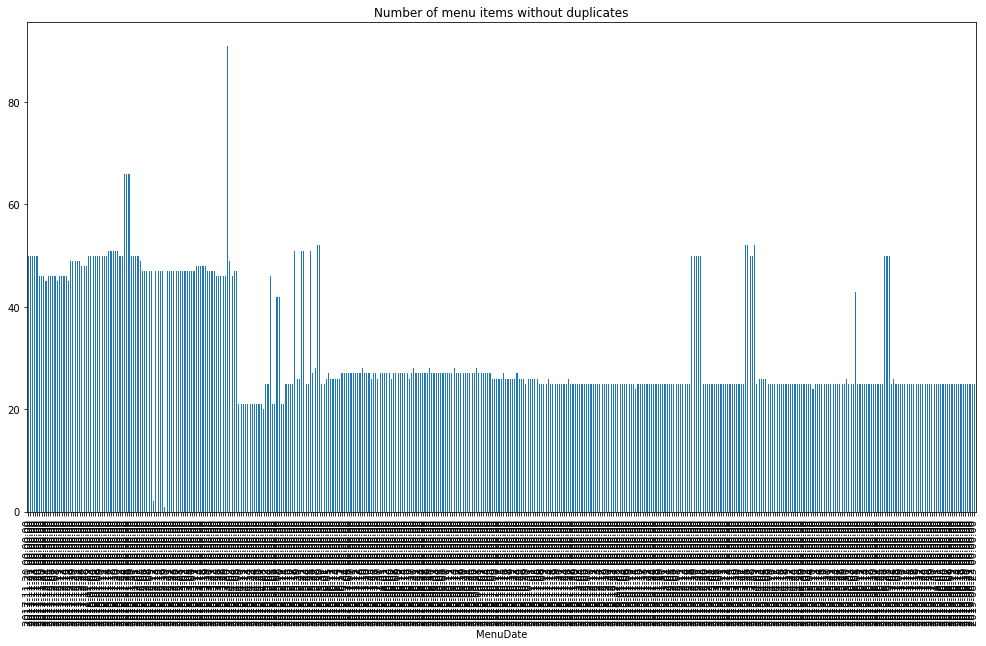

In [115]:
df_date_proc.groupby('MenuDate').size().plot.bar(rot=90, 
                                        figsize=(17, 9), 
                                        title='Number of menu items without duplicates');

After a certain date number of menu items became two times smaller.

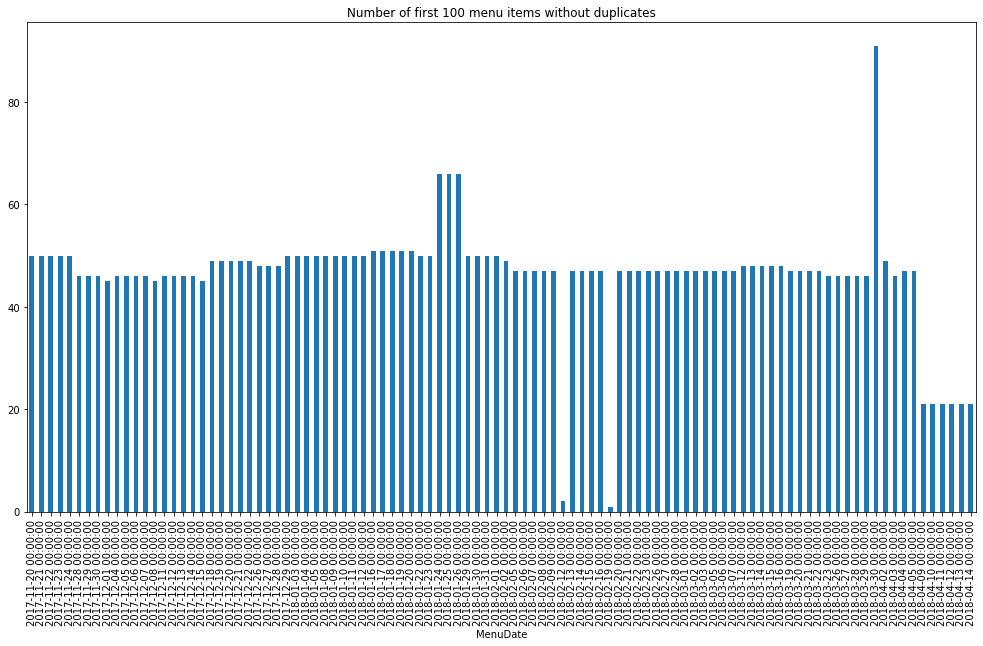

In [116]:
df_date_proc.groupby('MenuDate').size().head(100).plot.bar(rot=90, 
                                        figsize=(17, 9), 
                                        title='Number of first 100 menu items without duplicates');

It happened around April 9, 2018.

### Dealing with prices

In [117]:
df_date_proc.head()

,Food,Weight,Price,Type,File,MenuDate
0,Салат из капусты с яблоком,100,86 коп,NaN,Меню 14 января.xls,2019-01-14
1,"Салат ""Варя гуцульская""",100,1 руб 50 коп,NaN,Меню 14 января.xls,2019-01-14
2,"Салат""Английский""",100,1 руб 82 коп,NaN,Меню 14 января.xls,2019-01-14
3,Суп-харчо,250,2 руб 05 коп,Супы,Меню 14 января.xls,2019-01-14
4,Суп картофельный с фасолью и курицей,250,1 руб 58 коп,Супы,Меню 14 января.xls,2019-01-14


In [118]:
df_date_proc.tail()

,Food,Weight,Price,Type,File,MenuDate
16422,Пудинг из творога,150,2 руб 35 коп,Сладкие блюда,Меню с 29.07.xls,2019-08-02
16423,Напиток лимонный,0.2,60 коп,Напитки,Меню с 29.07.xls,2019-08-02
16424,Французская булочка с чесночной начинкой,шт.,70 коп,"Хлеб, хлебобулочные изделия",Меню с 29.07.xls,2019-08-02
16425,"Хлеб ""Чиабатта""",шт.,1 руб 15 коп,"Хлеб, хлебобулочные изделия",Меню с 29.07.xls,2019-08-02
16426,Хлеб,2кусочек,18 коп,"Хлеб, хлебобулочные изделия",Меню с 29.07.xls,2019-08-02


In [119]:
df_date_price_proc = df_date_proc.copy()

In [120]:
df_date_price_proc['Price'] = df_date_price_proc['Price'].apply(lambda x: pr.price_to_number(x))

In [121]:
df_date_price_proc.head()

,Food,Weight,Price,Type,File,MenuDate
0,Салат из капусты с яблоком,100,0.86,NaN,Меню 14 января.xls,2019-01-14
1,"Салат ""Варя гуцульская""",100,1.50,NaN,Меню 14 января.xls,2019-01-14
2,"Салат""Английский""",100,1.82,NaN,Меню 14 января.xls,2019-01-14
3,Суп-харчо,250,2.05,Супы,Меню 14 января.xls,2019-01-14
4,Суп картофельный с фасолью и курицей,250,1.58,Супы,Меню 14 января.xls,2019-01-14


In [122]:
df_date_price_proc.Price.describe()

count    13373.000000
mean         1.538640
std          1.244487
min          0.060000
25%          0.650000
50%          1.150000
75%          2.090000
max         17.000000
Name: Price, dtype: float64

What is the most expensive item?

In [123]:
df_date_price_proc[df_date_price_proc.Price >= 17]

,Food,Weight,Price,Type,File,MenuDate
14553,Куриные ножки в меду,1000,17.0,Вторые блюда,Меню с 12-16 августа.xls,2019-08-15
14728,Ножки куриные в меду,1000,17.0,Вторые блюда,Меню с 15.07 по 19.07.xls,2019-07-15


It is price per kilogram. We might need to look for a product that is most expensive not in absolute numbers, but in rubles per gram or kilogram.

### Dealing with weights

In [124]:
df_date_price_weight_proc = df_date_price_proc.copy()

In [125]:
df_date_price_weight_proc.head()

,Food,Weight,Price,Type,File,MenuDate
0,Салат из капусты с яблоком,100,0.86,NaN,Меню 14 января.xls,2019-01-14
1,"Салат ""Варя гуцульская""",100,1.50,NaN,Меню 14 января.xls,2019-01-14
2,"Салат""Английский""",100,1.82,NaN,Меню 14 января.xls,2019-01-14
3,Суп-харчо,250,2.05,Супы,Меню 14 января.xls,2019-01-14
4,Суп картофельный с фасолью и курицей,250,1.58,Супы,Меню 14 января.xls,2019-01-14


In [126]:
df_date_price_weight_proc['Weight'] = df_date_price_weight_proc['Weight'].apply(lambda x: pr.weight_to_number(x))

In [127]:
df_date_price_weight_proc.head()

,Food,Weight,Price,Type,File,MenuDate
0,Салат из капусты с яблоком,100.0,0.86,NaN,Меню 14 января.xls,2019-01-14
1,"Салат ""Варя гуцульская""",100.0,1.50,NaN,Меню 14 января.xls,2019-01-14
2,"Салат""Английский""",100.0,1.82,NaN,Меню 14 января.xls,2019-01-14
3,Суп-харчо,250.0,2.05,Супы,Меню 14 января.xls,2019-01-14
4,Суп картофельный с фасолью и курицей,250.0,1.58,Супы,Меню 14 января.xls,2019-01-14


In [128]:
df_date_price_weight_proc.tail()

,Food,Weight,Price,Type,File,MenuDate
16422,Пудинг из творога,150.0,2.35,Сладкие блюда,Меню с 29.07.xls,2019-08-02
16423,Напиток лимонный,0.2,0.60,Напитки,Меню с 29.07.xls,2019-08-02
16424,Французская булочка с чесночной начинкой,1.0,0.70,"Хлеб, хлебобулочные изделия",Меню с 29.07.xls,2019-08-02
16425,"Хлеб ""Чиабатта""",1.0,1.15,"Хлеб, хлебобулочные изделия",Меню с 29.07.xls,2019-08-02
16426,Хлеб,2.0,0.18,"Хлеб, хлебобулочные изделия",Меню с 29.07.xls,2019-08-02


In [129]:
df_date_price_weight_proc.shape

(13407, 6)

In [130]:
df_date_price_weight_proc[df_date_price_weight_proc.Weight.isna()]

,Food,Weight,Price,Type,File,MenuDate
1815,Горчица,NaN,0.25,Соусы,Меню с 05.02 по 09.02.2018г.xls,2018-02-06
1816,Сметана,NaN,0.50,Соусы,Меню с 05.02 по 09.02.2018г.xls,2018-02-06
1817,Соус соевый,NaN,0.25,Соусы,Меню с 05.02 по 09.02.2018г.xls,2018-02-06
1818,Кетчуп/ майонез,NaN,0.25,Соусы,Меню с 05.02 по 09.02.2018г.xls,2018-02-06
2792,Бендерики с курицей,NaN,2.95,Вторые блюда,Меню с 09.04 по 14.04.2018г..xls,2018-04-11
2793,Вареники с картофелем и грибами,NaN,1.80,Вторые блюда,Меню с 09.04 по 14.04.2018г..xls,2018-04-11
3727,"Зефир в шоколаде,зефир бело-розовый",NaN,NaN,Блинчики с творогом и сметаной,Меню с 12.02 по 16.02.2018г.xls,2018-02-12
10529,Беляши с мясом,NaN,NaN,Вторые блюда,Меню с 24-28 сентября.xls,2018-09-27


In [131]:
df_date_price_weight_proc.dropna(inplace=True)

In [132]:
df_date_price_weight_proc.shape

(11433, 6)

In [133]:
df_date_price_weight_proc['CostPerUnit'] = \
    df_date_price_weight_proc['Price'] / df_date_price_weight_proc['Weight']

In [134]:
df_date_price_weight_proc.head()

,Food,Weight,Price,Type,File,MenuDate,CostPerUnit
3,Суп-харчо,250.0,2.05,Супы,Меню 14 января.xls,2019-01-14,0.008200
4,Суп картофельный с фасолью и курицей,250.0,1.58,Супы,Меню 14 января.xls,2019-01-14,0.006320
5,Суп-пюре из бобовых,250.0,1.70,Супы,Меню 14 января.xls,2019-01-14,0.006800
6,Капрезе из грудки,140.0,4.10,Вторые блюда,Меню 14 января.xls,2019-01-14,0.029286
7,"Бифштек""Смак""",95.0,2.20,Вторые блюда,Меню 14 января.xls,2019-01-14,0.023158


In [135]:
df_date_price_weight_proc.CostPerUnit.describe()

count    11433.000000
mean         0.636094
std          1.705081
min          0.003000
25%          0.010000
50%          0.027125
75%          0.650000
max         20.000000
Name: CostPerUnit, dtype: float64

In [136]:
df_date_price_weight_proc[df_date_price_weight_proc.CostPerUnit >= 20].head()

,Food,Weight,Price,Type,File,MenuDate,CostPerUnit
970,"Сок""Рич""в ассортименте 1л",0.2,4.0,Напитки,Меню с 03.01 по 05.01.2018г -.xls,2018-01-03,20.0
1020,"Сок""Рич""в ассортименте 1л",0.2,4.0,Напитки,Меню с 03.01 по 05.01.2018г -.xls,2018-01-04,20.0
1070,"Сок""Рич""в ассортименте 1л",0.2,4.0,Напитки,Меню с 03.01 по 05.01.2018г -.xls,2018-01-05,20.0
1454,"Сок""Рич""в ассортименте 1л",0.2,4.0,Напитки,Меню с 04.12 по 08.12.2017г.xls,2017-12-04,20.0
1500,"Сок""Рич""в ассортименте 1л",0.2,4.0,Напитки,Меню с 04.12 по 08.12.2017г.xls,2017-12-05,20.0


Conversion to CostPerUnit is incorrect. Need to take into account "1л" in Food description and disregard the `Weight` value.

In [137]:
df_date_price_weight_proc[df_date_price_weight_proc.CostPerUnit.between(0.6, 2)].head()

,Food,Weight,Price,Type,File,MenuDate,CostPerUnit
21,Французская булочка с чесночной начиной,1.0,0.70,"Хлеб, хлебобулочные изделия",Меню 14 января.xls,2019-01-14,0.70
22,"Хлеб ""Чиабатта""",1.0,1.15,"Хлеб, хлебобулочные изделия",Меню 14 января.xls,2019-01-14,1.15
47,Французская булочка с чесночной начиной,1.0,0.70,"Хлеб, хлебобулочные изделия",Меню 19 октября.xls,2018-10-19,0.70
48,"Хлеб ""Чиабатта""",1.0,1.15,"Хлеб, хлебобулочные изделия",Меню 19 октября.xls,2018-10-19,1.15
73,Французская булочка с чесночной начиной,1.0,0.70,"Хлеб, хлебобулочные изделия",Меню 22 октября.xls,2018-10-22,0.70


In [138]:
df.loc[22]

Food                    Хлеб "Чиабатта"
Weight                              шт.
Price                      1 руб 15 коп
Type        Хлеб, хлебобулочные изделия
Key                          14.01.2019
Date                         2019-01-14
File                 Меню 14 января.xls
MenuDate            2019-01-14 00:00:00
Name: 22, dtype: object

Also the "шт." to 1.0 conversion seems to be wrong.